<a href="https://colab.research.google.com/github/mong-head/Rescorla-Wagner-model/blob/master/rescorla_wagner_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 조건
 use initial value of V = 0; learning rate β = 0.1 when the US is present or β = 0.05 otherwise ; US strength λ = 1 when the US is present unless otherwise specified or λ = 0 when the US is NOT present. 

# RW 변수 및 수식 설명
alpha : saliency of the CS 

beta : learning rate

∆V = αβ(λ − ΣV)

In [1]:
#공통
%matplotlib inline
import matplotlib.pyplot as plt

beta_givenUS = 0.1
beta_noUS = 0.05
lambda_givenUS = 1
lambda_noUS = 0

# Problem 1: Conditioned inhibition
1.	Two alternating trial types: trial 1: CS1+; trial 2: CS1/CS2-; 100 trials total
2.	Plot both CS1 and CS2 in the same graph
3.	Saliency: CS1:0.7; CS2: 0.7


In [2]:
def rw(V,alpha,sumV,learning):
  if learning==True:
    return V + alpha*beta_givenUS*(lambda_givenUS - sumV)
  elif learning==False :
    return V + alpha*beta_noUS*(lambda_noUS - sumV)

problem 1 : conditioned inhibition


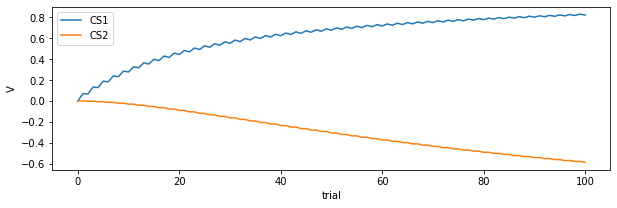

CS1 :  0.8305898577369798 , CS2:  -0.5787673845610095


In [3]:
alpha1 = 0.7
alpha2 = 0.7

trial = list(range(1,101))

V1 = [0]
V2 = [0]
old_v1=0
old_v2=0
new_v1=0
new_v2=0
for i in trial:
  old_v1 = new_v1
  old_v2 = new_v2
  if i%2 == 1:
    new_v1 = old_v1 + alpha1 * beta_givenUS * (lambda_givenUS - (old_v1))
    new_v2 = old_v2
    V1.append(new_v1)
    V2.append(new_v2)    
  elif i%2 == 0:
    new_v1 = old_v1 + alpha1*beta_noUS*(lambda_noUS - (old_v1+old_v2))
    V1.append(new_v1)
    new_v2 = old_v2 + alpha2*beta_noUS*(lambda_noUS - (old_v2+old_v1))
    V2.append(new_v2)
    
print("problem 1 : conditioned inhibition")
plt.figure(figsize=(10, 3))
trial.insert(0,0)
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.legend()
plt.show()
print("CS1 : ",V1[99],", CS2: ",V2[99])

CS1이 주어졌을 때만 US가 주어지고, CS2가 CS1과 함께 주어졌을 때에는 US가 없어서, 피실험자는 CS1는 갈수록 US가 나오는 excitatory가 되고, CS2는 CS1을 억제하는 것으로 inhibitory가 될 것이라 예상했습니다. 예상대로 CS1은 trial이 갈 수록 늘어가고, CS2는 trial이 지날 수록 더욱더 작아집니다.

# Problem 2: Overexpectation (2 points)
1.	Stage 1. group 1: CS1+, group 2: CS1+, 100 trials
2.	Stage 2. group 1: CS2+, group 2: CS2 +, 100 trials
3.	Stage 3. group 1: CS1/CS2+, group 2: Sit, 100 trials
4.	Stage 4. group 1: CS1/CS2-, group 2: CS1/CS2-, 10 trials
5.	Plot stage 1-4. Plot both individual and combined CSs for stage 3~4. 
6.	Saliency: CS1: 0.7 CS2: 0.7


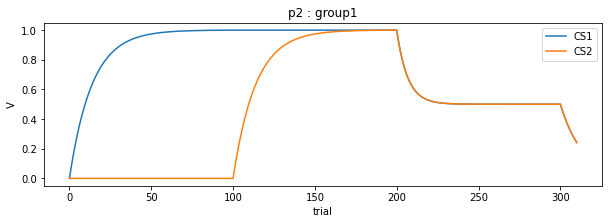

In [4]:
alpha1 = 0.7
alpha2 = 0.7

##group1
V1 = [0]
V2 = [0]
v1 = 0
v2 = 0

#stage1
trial = list(range(1,101))
for i in trial:
  v1 = rw(v1,alpha1,v1,True)
  V1.append(v1)
  V2.append(v2)

#stage2
trial = list(range(1,101))
for i in trial:
  v2 = rw(v2,alpha2,v2,True)
  V1.append(v1)
  V2.append(v2)

#stage3
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,True)
  v2 = rw(v2,alpha2,ori_v1+v2,True)
  V1.append(v1)
  V2.append(v2)

#stage4
trial = list(range(1,11))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,False)
  v2 = rw(v2,alpha2,ori_v1+v2,False)
  V1.append(v1)
  V2.append(v2)


trial = list(range(0,311))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p2 : group1")
plt.legend()
plt.show()

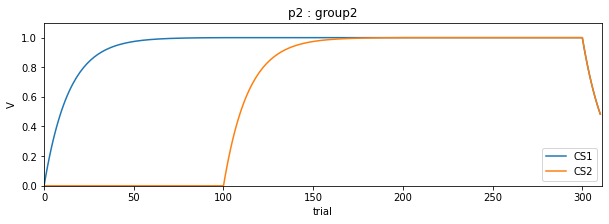

In [5]:
alpha1 = 0.7
alpha2 = 0.7

##group1
V1 = [0]
V2 = [0]
v1 = 0
v2 = 0

#stage1
trial = list(range(1,101))
for i in trial:
  v1 = rw(v1,alpha1,v1,True)
  V1.append(v1)
  V2.append(v2)

#stage2
trial = list(range(1,101))
for i in trial:
  v2 = rw(v2,alpha2,v2,True)
  V1.append(v1)
  V2.append(v2)

#stage3
for i in trial:
  V1.append(v1)
  V2.append(v2)

#stage4
trial = list(range(1,11))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,False)
  v2 = rw(v2,alpha2,ori_v1+v2,False)
  V1.append(v1)
  V2.append(v2)


trial = list(range(0,311))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p2 : group2")
plt.axis([0, 311, 0, 1.1])
plt.legend()
plt.show()

CS1,CS2 따로 학습한 뒤에 같이 제시되면 오히려 둘의 학습 효과가 둘다 떨어진다는 것을 논문을 읽으며 예상하였고, 실제 구현해본 결과 그러하였습니다. 하지만 어느정도 떨어지고 나서는 그 상태를 유지하는 것은 놀라웠습니다. 또, CS1/CS2+인 경우와 CS1/CS2-의 경우 차이점이 있을까 생각하였는데, 호기심으로 stage4를 10이 아닌 100trial을 하였을 때 경우를 보니 떨어지고 나서도 어느정도를 유지하는 CS1/CS2+와는 다르게 CS1/CS2-는 학습이 아예 되지 않는 0의 상태로 가는 것이 놀라웠습니다.

# Problem 3: Second-order conditioning (1 points)
1.	CS1+, 100 trials
2.	CS1/CS2-, 25 trials
3.	CS2-, 10 trials
4.	Saliency: CS1=CS2: 0.7


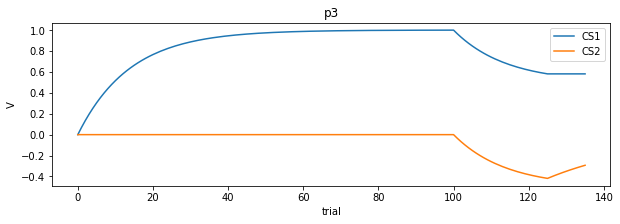

In [6]:
alpha1 = 0.7
alpha2 = 0.7

V1 = [0]
V2 = [0]
v1 = 0
v2 = 0

trial = list(range(1,101))
for i in trial:
  v1 = rw(v1,alpha1,v1,True)
  V1.append(v1)
  V2.append(v2)

trial = list(range(1,26))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,False)
  v2 = rw(v2,alpha2,ori_v1+v2,False)
  V1.append(v1)
  V2.append(v2)

trial = list(range(1,11))
for i in trial:
  v2 = rw(v2,alpha2,v2,False)
  V1.append(v1)
  V2.append(v2)


trial = list(range(0,136))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p3")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

second order conditioning은 RW의 대표적인 failure model입니다. RW의 예측에 따라 cs1을 먼저 학습시킨 stage1과 둘을 함께 제시하였을 때 us가 제시되지 않아 둘다 함께 감소하는 stage2까지 예상하였습니다. 즉, CS2가 inhibitory가 되는 것까지 예상하였습니다. 하지만 stage3에서 cs2만 us없이 주어졌을 때, stage2에서 보이는 경향과 같을 것이라 예상하였지만, 실제로는 그렇지 않았습니다. PW상으로 로 학습과 관련없는 0으로 다시 가는 경향을 보였습니다.

# Problem 4: Sensory preconditioning (2 points)
1.	Stage 1: CS1/CS2-, 100 trials
2.	Stage 2: CS2+, 100 trials
3.	Stage 3: CS1-, 10 trials
4.	Saliency: CS1: 0.7 CS2: 0.3


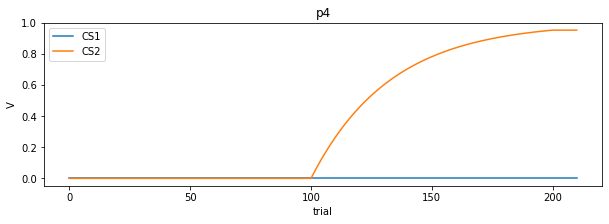

In [7]:
alpha1 = 0.7
alpha2 = 0.3

V1 = [0]
V2 = [0]
v1 = 0
v2 = 0

trial = list(range(1,101))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,False)
  v2 = rw(v2,alpha2,ori_v1+v2,False)
  V1.append(v1)
  V2.append(v2)

trial = list(range(1,101))
for i in trial:
  v2 = rw(v2,alpha2,v2,True)
  V1.append(v1)
  V2.append(v2)

trial = list(range(1,11))
for i in trial:
  v1 = rw(v1,alpha1,v1,False)
  V1.append(v1)
  V2.append(v2)


trial = list(range(0,211))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p4")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

RW적으로 생각을 해보았을 때, 처음에 둘 다 US없이 제시를 한다면 아무런 학습효과가 없을 것이라 예상하였습니다. 그런 상태에서 CS2를 US와 함께 제시한다면 평범한 acquisition곡선을 그릴 것이라 예상하였고, 마지막에 CS1을 US없이 학습한다고 하여도 원래 US에 대한 학습이 0이었기에 역시 학습을 전혀 하지 않을 것이라 예상하였습니다. 제 예상과 맞는 그래프가 나오게 되었습니다.

# Problem 5: Supernormal conditioning (2 points)
1.	Stage 1. group 1: Two alternating trial types: trial 1: CS1+; trial 2: CS1/CS2-, group 2: Sit control, 200 trials total
2.	Stage 2. group 1: CS1/CS2+, group 2: CS1/CS2+, 200 trials 
3.	Stage 3. CS1-, 10 trials for both groups
4.	Stage 4. CS2-, 10 trials for both groups
5.	Saliency: CS1=CS2: 0.7

Assume the initial value of CS2 = -0.8


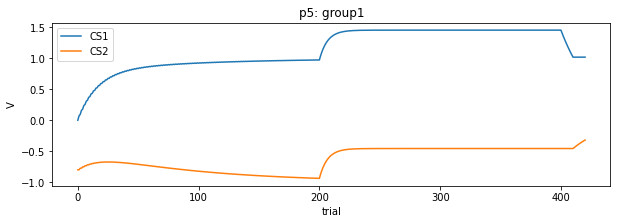

In [8]:
#group 1

alpha1 = 0.7
alpha2 = 0.7

V1 = [0]
V2 = [-0.8]
v1 = 0
v2 = -0.8

#stage1
trial = list(range(1,201))
for i in trial:
  if i%2==1:
    v1 = rw(v1,alpha1,v1,True)
    V1.append(v1)
    V2.append(v2)
  else:
    ori_v1 = v1
    v1 = rw(v1,alpha1,ori_v1+v2,False)
    v2 = rw(v2,alpha2,ori_v1+v2,False)
    V1.append(v1)
    V2.append(v2)

#stage2
trial = list(range(1,201))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,True)
  v2 = rw(v2,alpha2,ori_v1+v2,True)
  V1.append(v1)
  V2.append(v2)

#stage3
trial = list(range(1,11))
for i in trial:
  v1 = rw(v1,alpha1,v1,False)
  V1.append(v1)
  V2.append(v2)

#stage4
trial = list(range(1,11))
for i in trial:
  v2 = rw(v2,alpha2,v2,False)
  V1.append(v1)
  V2.append(v2)

trial = list(range(0,421))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p5: group1")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

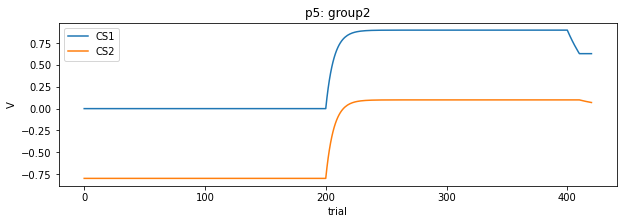

In [9]:
#group 2

alpha1 = 0.7
alpha2 = 0.7

V1 = [0]
V2 = [-0.8]
v1 = 0
v2 = -0.8

#stage1
trial = list(range(1,201))
for i in trial:
  V1.append(v1)
  V2.append(v2)

#stage2
trial = list(range(1,201))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,True)
  v2 = rw(v2,alpha2,ori_v1+v2,True)
  V1.append(v1)
  V2.append(v2)

#stage3
trial = list(range(1,11))
for i in trial:
  v1 = rw(v1,alpha1,v1,False)
  V1.append(v1)
  V2.append(v2)

#stage4
trial = list(range(1,11))
for i in trial:
  v2 = rw(v2,alpha2,v2,False)
  V1.append(v1)
  V2.append(v2)

trial = list(range(0,421))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p5: group2")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

RW적으로 생각해 보았을 때, group1에서는 stage1에서 CS1만 있을 때 US가 있고, CS2와 함께 주어졌을 떄에는 US가 없어서 conditioned inhitiotion이 일어난다고 생각하였고, 실제 그래프에서 그렇게 나왔습니다. 그 이후 CS1,CS2둘 다 제시하여 US가 주어졌을 때, CS1은 더 강화된다고 생각하였고 실제로 1을 넘은 그래프가 나왔습니다. CS2역시 inhibition으로 학습되었던 것이 어느정도 그렇지 않다고 학습(0쪽으로 학습)이 된다고 생각하였고 실제도 그러하였습니다. 마지막에 각각 US없이 제시하여 학습효과가 떨어진다(0쪽으로 간다)고 생각하였는데 실제도 그렇게 나왔습니다. group2에서 200 sit은 아무것도 하지 않는 것과 같고 따라서 학습한 것이 없습니다. 그 이후 CS1과 CS2함께 US가 제시되어 둘다 acquisition이 일어났고, 각각 stage3,4에서 학습효과가 떨어지는 것까지 예상하였습니다. 결론적으로 예상대로 일어난 그래프였습니다.

# Problem 6: Excitatory conditioning without the US (2 points)
1.	Assume the initial value of CS2 = -0.8
2.	Stage 1: CS1/CS2-, 25 trials
3.	Stage 2: CS1-, 10 trials
4.	Stage 3: CS2-, 10 trials
5.	Saliency: CS1=CS2: 0.7


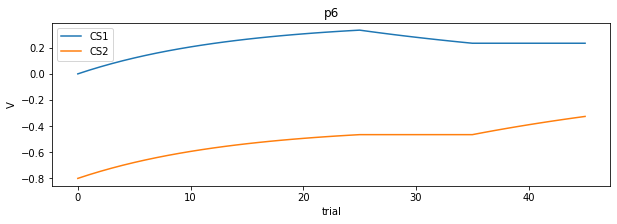

In [10]:
alpha1 = 0.7
alpha2 = 0.7

V1 = [0]
V2 = [-0.8]
v1 = 0
v2 = -0.8

#stage1
trial = list(range(1,26))
for i in trial:
  ori_v1 = v1
  v1 = rw(v1,alpha1,ori_v1+v2,False)
  v2 = rw(v2,alpha2,ori_v1+v2,False)
  V1.append(v1)
  V2.append(v2)

#stage2
trial = list(range(1,11))
for i in trial:
  v1 = rw(v1,alpha1,v1,False)
  V1.append(v1)
  V2.append(v2)

#stage3
trial = list(range(1,11))
for i in trial:
  v2 = rw(v2,alpha2,v2,False)
  V1.append(v1)
  V2.append(v2)

trial = list(range(0,46))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.plot(trial,V2,label="CS2")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("p6")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

처음 CS2는 -에서 진행하였기에 US가 제시되지 않는 stage1에서 CS1,CS2가 함께 주어진다면 원래 CS2만 주어지면 US일어나지 않는 방향으로 CS2가 학습이 되어있었기 떄문에 CS1은 둘 다 제시되었을 때 오히려 US가 일어날 것이라고 생각하는 방향으로 올라갈 것이라 예상하였고, CS2는 trial이 지날 수록 CS1이 올라감에 따라 점점 US에 대해 학습 자체가 0으로 되는 방향이 될 것이라 예상하였습니다. 하지만 stage2가 되었을 때, US예상했던 CS1에서는 Us가 일어나지 않자, 학습 감소하는 경향을 보일 것이라 예상했고 실제로도 그랬습니다.다만,  CS2의 경우에는 혼자 주어졌을 때에도 US가 제시되지 않자, US가 일어나지 않을 거라는 방향(-로 가는 방향)으로 갈 것이라 예상하였으나, 예상과는 다르게 0으로 가는 경향을 보였습니다.

# Optional question (2 points):
Simulate a conditioning case where the US is presented sometimes in the absence and sometimes in the presence of the CS, by assuming the context as a CS using R-W model. You can use your own parameters within the range specified by the R-W model. Using  several different sets will give you a nice set of date to plot in a graph. You can also try different sets of p(US/no CS) and p(US/CS). What did you find from the simulation?


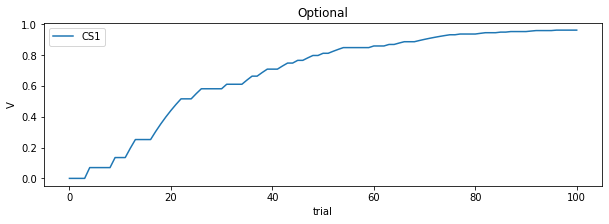

In [31]:
import random

#CS가 있을지(1) 없을지(0)
CS = [random.randint(0,1) for i in range(100)]  
trial = list(range(0,100))

alpha1 = 0.7

V1 = [0]
v1 = 0

for i in trial:
  #CS가 주어지는 경우
  if CS[i]==1:
    v1 = rw(v1,alpha1,v1,True)
    V1.append(v1)
  #CS없이 US만 있는 경우
  elif CS[i]==0:
    V1.append(v1)

import matplotlib.pyplot as plt
trial = list(range(0,101))

plt.figure(figsize=(10, 3))
plt.plot(trial,V1,label="CS1")
plt.xlabel("trial")
plt.ylabel("V")
plt.title("Optional")
#plt.axis([0, 136, 0, 1.1])
plt.legend()
plt.show()

제 생각으로는 US만 있을 때에는 학습이 유지되고, US,CS같이 주어진 경우 acquisition이 일어나는 것 같습니다. random변수로 CS가 주어질 지, 주어지지 않을지를 랜덤으로 정하여 그래프를 돌려보았을 때 위와 같은 그래프가 나타납니다. 